In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
sns.set_style('darkgrid')
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

In [38]:
df_ind = pd.read_csv('ANLSYS2/FITFULL/4ACT_all.csv',index_col = 0)

In [39]:
df_ind.head()
#df_ind = df_ind.dropna()

,Lambda,Max_act,iter,speed,speed_std,persistance,std_persit
0,1600.0,60.0,0,4.294364,3.031156,1.662591,0.0
1,1600.0,60.0,1,4.298147,3.127308,1.615412,0.0
2,400.0,190.0,0,1.407795,0.921811,1.984541,0.0
3,400.0,190.0,1,1.410035,0.952965,1.952409,0.0
4,400.0,80.0,0,1.970563,1.179194,1.660739,0.0


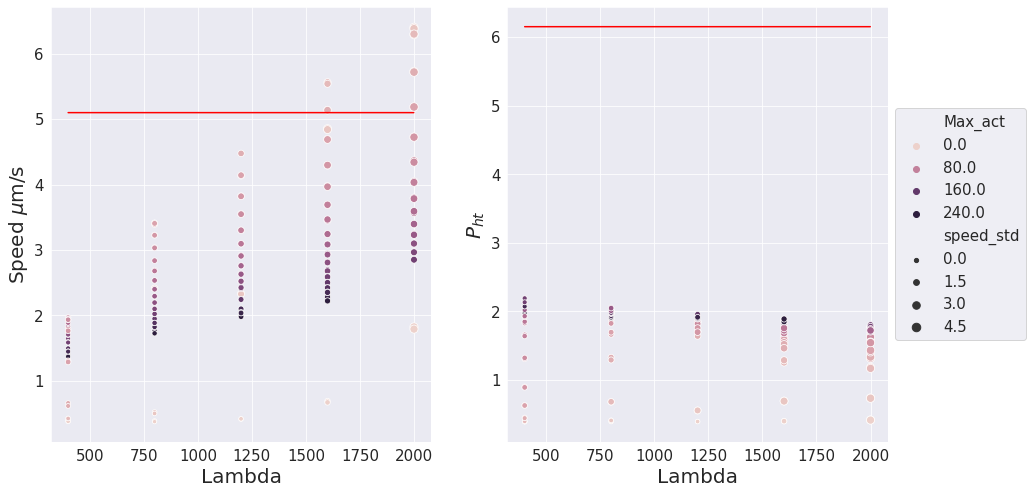

In [40]:
# Plot
# lambda vs speed,persist
f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,8))
sns.scatterplot(x = 'Lambda',y = 'speed', hue = 'Max_act',size = 'speed_std',units = 'iter',data = df_ind, ax = ax1,legend = False)
sns.scatterplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',size = 'speed_std',units = 'iter',data = df_ind, ax = ax2, legend = 'brief')
#sns.scatterplot(x = 'Lambda',y = 'pooled_pers',hue = 'Max_act',data = ZOOM_act, ax = ax3, legend = 'full')

#sns.lineplot(x = 'Lambda',y = 'speed', hue = 'Max_act',data = ZOOM_prfdr, ax = ax1,legend = 'full')
#sns.lineplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',data = ZOOM_prfdr, ax = ax2, legend = 'full')
ax1.plot(range(400,2000),[5.10] * 1600,c = 'r')
# ax2.plot(range(0,3000),[3.84] * 3000,c = 'r')
ax2.plot(range(400,2000),[6.15] * 1600,c = 'r')

ax1.set_ylabel('Speed $\mu$m/s',fontsize = 20)
ax1.set_xlabel('Lambda',fontsize = 20)

ax2.set_ylabel('$P_{ht}$',fontsize = 20)
ax2.set_xlabel('Lambda',fontsize = 20)
# ax1.legend(fontsize = 15)
ax2.legend(fontsize = 15,loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [41]:
def cumul_err(x):
    # unpack : 
    speed = x[0]
    uspeed = x[1]
    lspeed = x[2]
    pers = x[3]

    
    s_ = 5.104099
    p_ = 6.146018
    
    cum_err = abs(s_ - speed) + abs(s_ - uspeed) + abs(s_ - lspeed) + abs(p_ - pers)
    return cum_err

merged = df_ind
merged['upper_speed'] = merged.speed + merged.speed_std
merged['lower_speed'] = merged.speed - merged.speed_std

merged['Error'] = merged[['speed','upper_speed','lower_speed','persistance']].apply(cumul_err,axis = 1)
# find minumum :
merged = merged.dropna()
min_err = min(merged.Error)
opt_params = merged[merged.Error == min_err]#[['Lambda','Max_act','Error']]
opt_params.head()

,Lambda,Max_act,iter,speed,speed_std,persistance,std_persit,upper_speed,lower_speed,Error
88,1200.0,40.0,0,4.476568,2.068367,1.642171,0.0,6.544934,2.408201,9.268112


In [42]:
x = merged[merged.Lambda == 800.0]
x = x[x.Max_act == 30.]
x.head()

,Lambda,Max_act,iter,speed,speed_std,persistance,std_persit,upper_speed,lower_speed,Error
110,800.0,30.0,0,2.412105,2.015427,0.681862,0.0,4.427532,0.396678,13.540139
111,800.0,30.0,1,2.413955,2.024985,0.684349,0.0,4.438940,0.388970,13.532100


In [43]:
# sum over same lambda max act combis
# params = pd.MultiIndex.from_frame(merged[['Lambda','Max_act']])
# merged.mean(axis = 0,level = params)
rows = []
#print(merged[['Lambda','Max_act']].to_numpy())
parameters = np.unique(merged[['Lambda','Max_act']].to_numpy(),axis = 0)
#print(parameters)
for params in parameters:
    print(params)
    x = merged[merged.Lambda == params[0]]
    x = x[x.Max_act == params[1]]
    rows.append(x.mean().to_numpy())

[400.  10.]
[400.  20.]
[400.  30.]
[400.  40.]
[400.  50.]
[400.  60.]
[400.  70.]
[400.  80.]
[400.  90.]
[400. 100.]
[400. 110.]
[400. 120.]
[400. 130.]
[400. 140.]
[400. 150.]
[400. 170.]
[400. 180.]
[400. 190.]
[400. 200.]
[800.  10.]
[800.  20.]
[800.  30.]
[800.  40.]
[800.  50.]
[800.  60.]
[800.  70.]
[800.  80.]
[800.  90.]
[800. 100.]
[800. 110.]
[800. 120.]
[800. 130.]
[800. 140.]
[800. 150.]
[800. 160.]
[800. 170.]
[800. 180.]
[800. 190.]
[800. 200.]
[1200.   10.]
[1200.   20.]
[1200.   40.]
[1200.   50.]
[1200.   60.]
[1200.   70.]
[1200.   80.]
[1200.   90.]
[1200.  100.]
[1200.  110.]
[1200.  120.]
[1200.  130.]
[1200.  140.]
[1200.  160.]
[1200.  180.]
[1200.  190.]
[1200.  200.]
[1600.   10.]
[1600.   20.]
[1600.   30.]
[1600.   40.]
[1600.   50.]
[1600.   60.]
[1600.   70.]
[1600.   80.]
[1600.   90.]
[1600.  100.]
[1600.  110.]
[1600.  120.]
[1600.  130.]
[1600.  140.]
[1600.  150.]
[1600.  160.]
[1600.  170.]
[1600.  180.]
[1600.  190.]
[1600.  200.]
[2000.   10.]


In [44]:
meanDF = pd.DataFrame(data = rows,columns = merged.columns)
min_err = min(meanDF.Error)
opt_params = meanDF[meanDF.Error == min_err]#[['Lambda','Max_act','Error']]
opt_params.head()

,Lambda,Max_act,iter,speed,speed_std,persistance,std_persit,upper_speed,lower_speed,Error
41,1200.0,40.0,0.0,4.476568,2.068367,1.642171,0.0,6.544934,2.408201,9.268112


In [32]:
df_ind = pd.read_csv('ANLSYS2/FITFULL/4PRFDR_all.csv',index_col = 0)
df_ind = df_ind[df_ind.iter != 2]
df_ind

,Lambda,Max_act,iter,speed,speed_std,persistance,std_persit
0,800.0,0.1,0,5.033243,2.532095,0.687486,0.0
1,800.0,0.1,1,5.019951,2.518116,0.683786,0.0
2,200.0,0.3,0,0.978848,0.868652,0.379237,0.0
3,200.0,0.3,1,0.982555,0.888639,0.378928,0.0
4,400.0,1.0,0,1.530565,1.452743,0.745010,0.0
...,...,...,...,...,...,...,...
81,1000.0,0.2,1,6.171148,2.820769,0.772557,0.0
82,1000.0,0.5,0,6.354206,2.841263,0.816684,0.0
83,1000.0,0.5,1,6.364937,2.870087,0.826240,0.0
84,800.0,0.9,0,5.999312,2.469638,1.030876,0.0


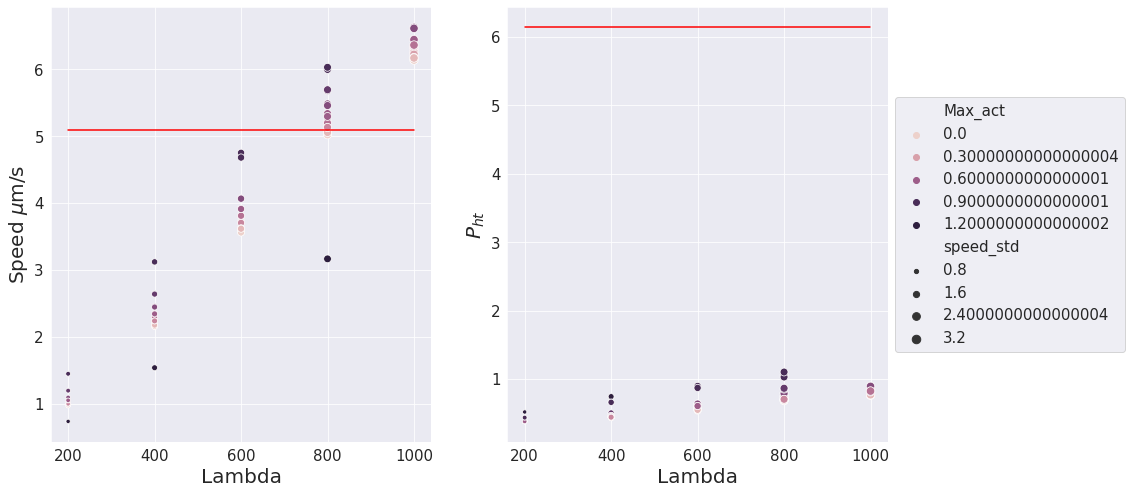

In [33]:
# Plot
# lambda vs speed,persist
f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,8))
sns.scatterplot(x = 'Lambda',y = 'speed', hue = 'Max_act',size = 'speed_std',data = df_ind, ax = ax1,legend = False)
sns.scatterplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',size = 'speed_std',data = df_ind, ax = ax2, legend = 'brief')
#sns.scatterplot(x = 'Lambda',y = 'pooled_pers',hue = 'Max_act',data = ZOOM_act, ax = ax3, legend = 'full')

#sns.lineplot(x = 'Lambda',y = 'speed', hue = 'Max_act',data = ZOOM_prfdr, ax = ax1,legend = 'full')
#sns.lineplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',data = ZOOM_prfdr, ax = ax2, legend = 'full')
ax1.plot(range(200,1000),[5.10] * 800,c = 'r')
# ax2.plot(range(0,3000),[3.84] * 2500,c = 'r')
ax2.plot(range(200,1000),[6.15] * 800,c = 'r')
ax1.set_ylabel('Speed $\mu$m/s',fontsize = 20)
ax1.set_xlabel('Lambda',fontsize = 20)

ax2.set_ylabel('$P_{ht}$',fontsize = 20)
ax2.set_xlabel('Lambda',fontsize = 20)
# ax1.legend(fontsize = 15)
ax2.legend(fontsize = 15,loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.show()

In [34]:
merged = df_ind
merged['upper_speed'] = merged.speed + merged.speed_std
merged['lower_speed'] = merged.speed - merged.speed_std

merged['Error'] = merged[['speed','upper_speed','lower_speed','persistance']].apply(cumul_err,axis = 1)
# find minumum :
merged = merged.dropna()
min_err = min(merged.Error)
opt_params = merged[merged.Error == min_err]#[['Lambda','Max_act','Error']]
opt_params.head()

,Lambda,Max_act,iter,speed,speed_std,persistance,std_persit,upper_speed,lower_speed,Error
56,600.0,0.9,0,4.751268,2.158662,0.899516,0.0,6.90993,2.592606,9.916657


In [35]:
# sum over same lambda max act combis
# params = pd.MultiIndex.from_frame(merged[['Lambda','Max_act']])
# merged.mean(axis = 0,level = params)
rows = []
#print(merged[['Lambda','Max_act']].to_numpy())
parameters = np.unique(merged[['Lambda','Max_act']].to_numpy(),axis = 0)
#print(parameters)
for params in parameters:
    print(params)
    x = merged[merged.Lambda == params[0]]
    x = x[x.Max_act == params[1]]
    rows.append(x.mean().to_numpy())

[2.e+02 1.e-01]
[200.    0.3]
[200.    0.4]
[200.    0.5]
[200.    0.6]
[200.    0.7]
[200.    0.8]
[200.    0.9]
[200.   1.]
[4.e+02 1.e-01]
[4.e+02 2.e-01]
[4.e+02 3.e-01]
[400.    0.4]
[400.    0.5]
[400.    0.6]
[400.    0.7]
[400.    0.8]
[400.    0.9]
[400.   1.]
[6.e+02 1.e-01]
[6.e+02 2.e-01]
[6.e+02 4.e-01]
[6.e+02 5.e-01]
[600.    0.6]
[600.    0.7]
[600.    0.9]
[8.e+02 1.e-01]
[8.e+02 2.e-01]
[8.e+02 3.e-01]
[8.e+02 4.e-01]
[8.e+02 5.e-01]
[8.e+02 6.e-01]
[8.e+02 7.e-01]
[800.    0.8]
[800.    0.9]
[800.   1.]
[1.e+03 1.e-01]
[1.e+03 2.e-01]
[1.e+03 3.e-01]
[1.e+03 4.e-01]
[1.e+03 5.e-01]
[1.e+03 6.e-01]
[1.e+03 7.e-01]


In [36]:
meanDF = pd.DataFrame(data = rows,columns = merged.columns)
min_err = min(meanDF.Error)
opt_params = meanDF[meanDF.Error == min_err]#[['Lambda','Max_act','Error']]
opt_params.head()

,Lambda,Max_act,iter,speed,speed_std,persistance,std_persit,upper_speed,lower_speed,Error
25,600.0,0.9,0.5,4.716305,2.147003,0.885626,0.0,6.863308,2.569303,9.942191
